# Children's Book Selections

---

This collection is made up of general and rare children's books consisting of classics and lesser-known gems published in the United States and England before 1924. Highlights include works by prominent American illustrators like W.W. Denslow and Howard Pyle, as well as renowned English illustrators such as Randolph Caldecott and Kate Greenaway. The collection spans multiple generations and themes, consisting of materials designed for learning to read, supporting classroom instruction, and fostering the imagination.

In [79]:
import requests

In [80]:
import json

In [81]:
from IPython.display import Image, display

In [82]:
collection_result =requests.get('https://www.loc.gov/collections/childrens-book-selections/?fo=json').json()

This code below displays all the titles in the children's book collection in alphabetical order through paginated results from the LOC web API and the lambda function. `sorted(collection_result["results"], key=lambda x: x["title"])`, sorts the list of dictionaries `(collection_result["results"])` based on the values of the "title" key in each dictionary.The loop then continuously fetches and prints the titles of collections present on the current page of results. After printing titles for the current page, it checks if there is a "next" page available. If a next page exists, it updates the `collection_result` variable with the next page using the `requests.get(next_page).json()` call. This process repeats until there are no more pages (when `next_page` is `None`), ending the iteration through the paginated data.

In [86]:
initial_url = 'https://www.loc.gov/collections/childrens-book-selections/?fo=json&c=100'
collection_result = requests.get(initial_url).json()

while True:
    for collection in sorted(collection_result["results"], key=lambda x: x["title"]):
        print(collection["title"])

    next_page = collection_result["pagination"]["next"]

    if next_page is not None:
        collection_result = requests.get(next_page).json()
    else:
        break



A apple pie
A child's garden of verses
A little pretty pocket-book : intended for the instruction and amusement of little Master Tommy, and pretty Miss Polly : with two letters from Jack the giant-killer, as also a ball and pincushion, the use of which will infallibly make Tommy a good boy, and Polly a good girl : to which is added, A little song-book, being a new attempt to teach children the use of the English alphabet, by way of diversion
A wonder book for girls and boys
Aesop for Children Interactive Book
Articles and Essays
Ballad of the lost hare
Baseball A B C.
Children of our town
Children's Book Selections
Collection Highlights
Denslow's Humpty Dumpty
Easy and instructive lessons for children. Also, The ladder to learning, or, A selection of fables consisting of words of only one syllable : being an easy introduction to the useful art of reading.
Elsie Dinsmore
Gobolinks, or shadow-pictures for young and old
Goody Two-Shoes : illuminated with ten pictures.
Jack the giant kille

This code displays the top 10 contributors to the children's book selections. Using the counter object named contributor_counter to track the occurrences, it utilises the requests library to fetch JSON data from the API regarding the children's book selections, and iterates through the API response to increment contributor counts. Displaying the top 10 contributors.

> The results are only for the first 25 results so this not the true count of contribution.

<Axes: >

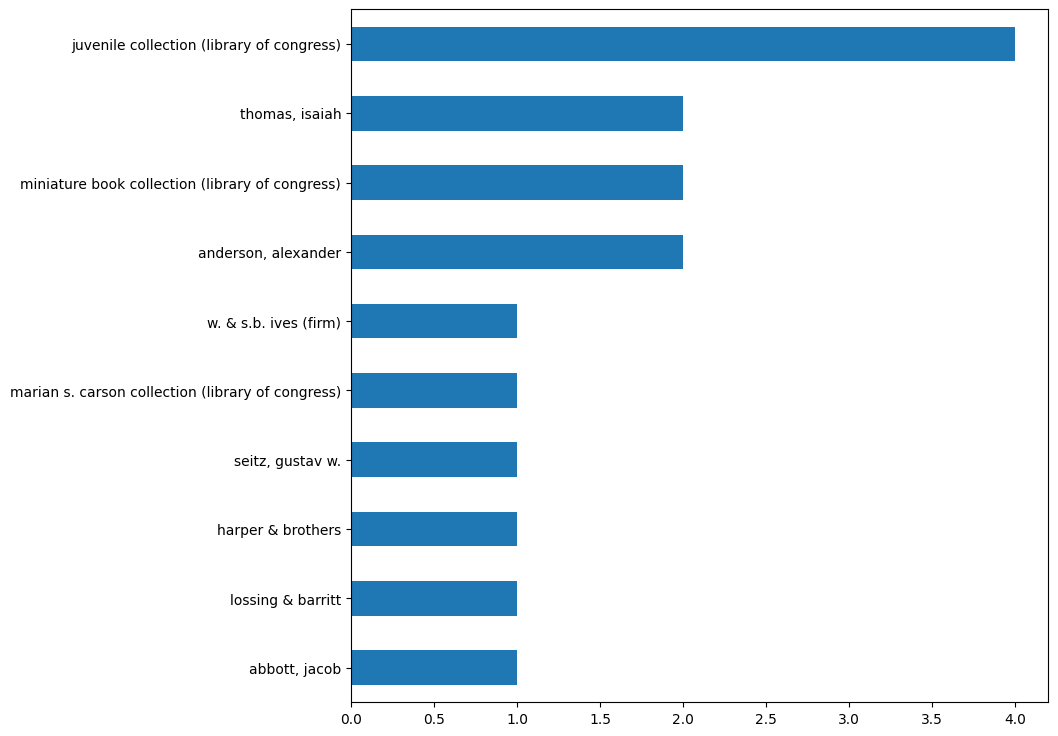

In [111]:
import pandas as pd
%matplotlib inline
from collections import Counter

contributor_counter = Counter()

wwi_sheet_music = requests.get("https://www.loc.gov/collections/childrens-book-selections/?fo=json").json()

for item in wwi_sheet_music["results"]:
    if 'contributor' in item and item['contributor'] is not None and len(item['contributor']) > 0:
        for contributor in item['contributor']:
            contributor_counter[contributor] +=1

top_contributors = 10
top_contributors_series = pd.Series(contributor_counter).nlargest(top_contributors) #return the contributor with the largest count
top_contributors_series.sort_values(ascending=True).plot(kind='barh', figsize=(9, 9))



This code iterates through each item in the collection, and for each item, it retrieves the "subject" information. If the subject contains the phrase 'juvenile literature', it extracts the "title" and "image_url" of that item. Finally, it prints the title and subject, and displays the corresponding image using IPython's Image and display functions. If the "image_url" is not available, it prints a default title and subject with no image.

In [31]:
import requests
from IPython.display import Image, display

wwi_sheet_music = requests.get("https://www.loc.gov/collections/childrens-book-selections/?fo=json").json()

for item in wwi_sheet_music["results"]:
    subject = item.get("subject", "N/A")

    if 'juvenile literature' in subject:
        title, image_url = item.get("title", "No Title"), item.get("image_url", [""])[0]

        print("Title:", title)
        print("Subject:", subject)
        display(Image(url=image_url))


Title: Learning to think : consisting of easy and entertaining lessons, designed to interest and assist in the first unfolding of the reflective and reasoning powers of children
Subject: ['juvenile literature', 'thought and thinking', 'reasoning in children']


Title: The mansion of happiness : an instructive moral and entertaining amusement.
Subject: ['conduct of life', 'winter', 'toy and movable books', 'specimens', 'board games', 'virtues', 'christmas', 'stories in rhyme', 'fiction', 'juvenile literature', 'children']


Title: The tales of Peter Parley about America : with engravings.
Subject: ['description and travel', 'atlantic states', 'colonial period', 'united states', 'juvenile literature', 'history']


Title: The life of George Washington : with curious anecdotes, equally honourable to himself and exemplary to his young countrymen
Subject: ['generals', 'presidents', 'united states', 'washington, george', 'juvenile literature', 'biography']


Title: Baseball A B C.
Subject: ['alphabet', 'readers (primary)', 'alphabet books', 'baseball', 'english language', 'juvenile literature']


Title: The book of trades.
Subject: ['miniature books', 'specimens', 'juvenile literature', 'vocational guidance', 'occupations']


Title: The juvenile national calendar, or, A familiar description of the U.S. government.
Subject: ['united states', 'politics and government', 'juvenile literature', 'officials and employees']


Title: The book of the cat : with facsimiles of drawings in colour
Subject: ['cats', 'juvenile literature', 'pictorial works']


Title: Rip Van Winkle
Subject: ['juvenile literature']


Title: McGuffey's newly revised eclectic primer, with pictorial illustrations.
Subject: ['juvenile literature', 'readers (primary)']


Title: Easy and instructive lessons for children. Also, The ladder to learning, or, A selection of fables consisting of words of only one syllable : being an easy introduction to the useful art of reading.
Subject: ['juvenile literature', 'readers (primary)']


Title: The illustrated primer, or, The first book for children : designed for home or parental instruction : embellished with numerous engravings, and pretty stories, which will please the children amazingly!
Subject: ['juvenile literature', 'readers (primary)']


Title: The New-England primer improved : for the more easy attaining the true reading of English, to which is added, the Assembly of Divines, and Mr. Cotton's catechism
Subject: ['early works to 1800', 'catechisms, english', 'juvenile literature', 'readers (primary)']


Title: The school song book : adapted to the scenes of the school room : written for American children and youth
Subject: ["children's songs", 'juvenile literature']


Title: The History of insects.
Subject: ['insects', 'miniature books', 'juvenile literature', 'chapbooks', 'specimens']


Title: A little pretty pocket-book : intended for the instruction and amusement of little Master Tommy, and pretty Miss Polly : with two letters from Jack the giant-killer, as also a ball and pincushion, the use of which will infallibly make Tommy a good boy, and Polly a good girl : to which is added, A little song-book, being a new attempt to teach children the use of the English alphabet, by way of diversion
Subject: ['worcester', 'readers (primary)', 'united states', 'early works to 1800', 'games', 'massachusetts', 'etiquette for children and teenagers', 'juvenile literature']


Title: Marmaduke Multiply
Subject: ['multiplication', 'nursery rhymes', 'juvenile literature', 'juvenile poetry']


Title: The puzzling-cap : a choice collection of riddles, in familiar verse, with a curious cut to each.
Subject: ['riddles, juvenile', 'juvenile literature']


Title: The history of little Goody Twoshoes, otherwise called Mrs. Margery Twoshoes : with the means by which she acquired her learning and wisdom and in consequence thereof her estate ... see the original manuscript in the Vatican at Rome, and the cuts by Michael Angelo, illustrated with the comments of our great modern criticks.
Subject: ['juvenile literature']
